In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import collections

# Import Discharge & Area Data

In [9]:
#Discharge Data

path = r'C:\Users\jbpat\Documents\ME451b\ME451Research\Tests'
allFiles = glob.glob(os.path.join(path,"*.csv"))

dfdict={}

for file_ in allFiles:
    #type(file_), dict_keys([])
    filen = str(file_)
    #print(len(filen))
    #print(filen[45:-4])
    
    dfdict[filen[45:-4]] = (pd.read_csv(file_, sep=',', header=None, usecols=[3,4,10,16,22], \
                                        names=['Time(s)', 'CH1(V)', 'CH2(V)', 'CH3(V)','CH4(V)'], \
                                        na_values =".")).dropna()
    

#Area Data
directory = "C:/Users/jbpat/Documents/ME451b/ME451Research/"
file = "DOETests.xlsx"
df_DOE = pd.read_excel("%s%s" % (directory, file))
df_area = df_DOE[['Test','Trial','Rinner (micron)','Ainner (mm^2)','Router (micron)','Aouter (mm^2)']]


# Dicharge Analysis

    1. Calculate Voltage, Current, Power, Energy
    2. Plot Power

In [10]:
stat_dict = {} #dictionary of tests having dictionaries of trials of dataframes that hold stats about power
dfdict_stat = {}  #this will eventually be a dataframe

nrg_temp = np.zeros((4,6)) #array to store discharge energy for each test and trials
#df_nrg = {} #this will eventuall be a dataframe

for test in np.arange(1,4):
   
    plt.figure(figsize=(20,10))
    leglbl = []
    
    stat_dict[test] = {}
    #nrg[test] = {}
    
    for trial in np.arange(1,6):
        key = "Test"+str(test)+"."+str(trial)
        
        #Calculate V, I, P
        dfdict[key]['Voltage(V)'] = dfdict[key]['CH3(V)'] - dfdict[key]['CH4(V)']
        dfdict[key]['Current(A)'] = (dfdict[key]['CH2(V)'] - dfdict[key]['CH3(V)'])/0.6
        dfdict[key]['Power(W)'] = dfdict[key]['Voltage(V)'] * dfdict[key]['Current(A)']
        
        #Filter data
        fltd = dfdict[key][
    
                (dfdict[key]['CH1(V)']  > 0) & (dfdict[key]['CH1(V)'] < 10) &
                (dfdict[key]['Power(W)']  > 0) & (dfdict[key]['Time(s)']  > 0) 

               ][['Time(s)','Power(W)']]
        
        #calculate energy
        nrg_temp[test,trial] = np.trapz(fltd['Power(W)'].values, fltd['Time(s)'].values)*1000 #energy in millliJoules
        
        #Generate summary (Power(W)) of trials, stored in dictionary 'stat_dict' within 'sub'-dictionary 'key'
        stat_dict[test][trial] = (fltd['Power(W)'].describe()).drop(['25%','50%','75%'])
        
        #Make plots
        plt.axes([0.1, 0.1, 0.8, 0.8])
        plt.plot(fltd['Time(s)'],fltd['Power(W)'], linewidth = 1)
        plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%2.1e'))
        plt.xlabel('Time(s)',fontsize=20)
        plt.ylabel('Power(W)',fontsize=20)
        leglbl.append("Trial:"+str(trial))
        plt.legend(leglbl)
        plt.title("Test " +str(test),fontsize=20)
        plt.axes([0.2, 0.4, 0.4, 0.4])
        plt.plot(fltd['Time(s)'], fltd['Power(W)'], linewidth = 0.5)
        plt.xlim(0, fltd['Time(s)'].max()*0.8)
        plt.ylim(0, fltd['Power(W)'].max()*0.25)
        
        
        
    
    #Make dataframe of stats summary 
    dfdict_stat[test] = pd.DataFrame(stat_dict[test])                    
    dfdict_stat[test]['Trials Average'] = dfdict_stat[test].mean(axis=1) 
    
    
    plt.gcf().savefig('{}.png'.format("Test " +str(test)))

nrg = nrg_temp[1:4,1:6]
nrg_df = pd.DataFrame(nrg, index= ['Test '+str(i) for i in range(1,4)], 
                      columns = ['Trial ' + str(j) for j in range(1,6)] )

nrg_df['AvgEgy(mJ)'] = nrg_df.mean(axis=1)
nrg_df['Std Dev'] = nrg_df.std(axis=1)
plt.figure()

nrg_df['AvgEgy(mJ)'].plot(kind = 'bar')
plt.show()

KeyError: 'Test1.1'

    3. Energy 

In [50]:
plt.figure()
nrg_df
nrg_df2 = nrg_df[['AvgEgy(mJ)','Std Dev']]
nrg_df2

,AvgEgy(mJ),Std Dev
Test 1,10.720014,3.950930
Test 2,11.296267,3.955306
Test 3,18.837605,6.711509


    4. Area and Radius

In [103]:
#Inner Radius (separated by Test)

ir_array = np.zeros((3,2))

for i in range(0,2):
    for j in range(0,3):
        ir_array[j,0] = df_area['Rinner (micron)'][ (df_area['Test'] == j+1) ].mean()
        ir_array[j,1] = df_area['Rinner (micron)'][ (df_area['Test'] == j+1) ].std()

ir_df = pd.DataFrame(ir_array, index= ['Test '+str(i) for i in range(1,4)], 
                      columns = ['Avg Rin(micron)', 'Std Rin(micron)'] )

ir_df

,Avg Rin(micron),Std Rin(micron)
Test 1,65.54,3.391607
Test 2,52.06,10.510614
Test 3,56.32,2.786934


In [114]:
#Outer Radius (separated by Test)

or_array = np.zeros((3,2))

for i in range(0,2):
    for j in range(0,3):
        or_array[j,0] = df_area['Router (micron)'][ (df_area['Test'] == j+1) ].mean()
        or_array[j,1] = df_area['Router (micron)'][ (df_area['Test'] == j+1) ].std()

or_df = pd.DataFrame(or_array, index= ['Test '+str(i) for i in range(1,4)], 
                      columns = ['Avg Rout(micron)', 'Std Rout(micron)'] )

or_df

,Avg Rout(micron),Std Rout(micron)
Test 1,124.82,11.580458
Test 2,102.90,24.343069
Test 3,138.62,21.918189


In [183]:
#Combining Dataframes (Rout,Rin,Energy)
main_df = pd.concat([ir_df,or_df,nrg_df2],axis=1)
main_df

,Avg Rin(micron),Std Rin(micron),Avg Rout(micron),Std Rout(micron),AvgEgy(mJ),Std Dev
Test 1,65.54,3.391607,124.82,11.580458,10.720014,3.950930
Test 2,52.06,10.510614,102.90,24.343069,11.296267,3.955306
Test 3,56.32,2.786934,138.62,21.918189,18.837605,6.711509


# Crater & Overflow Radius vs. Discharge Nrg

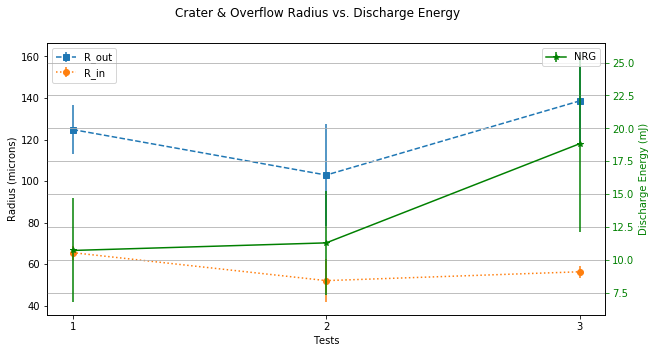

In [177]:
fig, ax1 = plt.subplots(figsize=(10,5))

label = or_df.index
lgd = ['R_outer', 'R_inner']
ax1.errorbar([1,2,3], or_df['Avg Rout(micron)'], or_df['Std Rout(micron)'],
            marker='s', ls='dashed', barsabove=True, label ='R_out')

ax1.set_xlabel('Tests')
ax1.set_xticks([1,2,3])
ax1.set_ylabel('Radius (microns)')

ax1.errorbar([1,2,3], ir_df['Avg Rin(micron)'], ir_df['Std Rin(micron)'],
            marker='o', ls='dotted', barsabove=True, label = 'R_in')

ax2 = ax1.twinx()

ax2.errorbar([1,2,3], nrg_df['AvgEgy(mJ)'], nrg_df['Std Dev'],
            marker='*', ls='solid', barsabove=True, label = 'NRG', c ='g')

ax2.set_ylabel('Discharge Energy (mJ)', color='g')
ax2.tick_params('y', colors='g')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.suptitle('Crater & Overflow Radius vs. Discharge Energy')

plt.gcf().savefig('Radius vs. Discharge Energy.png')

plt.show()

# Rough Work

In [45]:
dtype = dict()
ary = np.fromiter(stat_dict[1].items(), 
                  dtype=dtype, count = len(stat_dict[1]))

ValueError: setting an array element with a sequence.

In [50]:
#calculating integral for energy using trapezoidal rule
np.trapz(fltd['Power(W)'].values,
                                    fltd['Time(s)'].values)

0.025027670140240009

In [27]:
(dfdict_stat[1])

,1,2,3,4,5,Trials Average
count,1075.000000,1038.000000,928.000000,1385.000000,1293.000000,1143.800000
mean,215.156589,138.985228,65.625000,238.252708,235.545244,178.712954
std,163.336006,230.618820,191.500362,360.998039,143.546493,217.999944
min,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667
max,2426.666667,4766.666667,3960.000000,12740.000000,3200.000000,5418.666667


In [24]:
for key,value in dfdict_stat.items():
    dfdict_stat[key]['Average'] = dfdict_stat[key].mean(axis=1) 
    dfdict_stat[key].index.rename(['No. of Data Pts', 'Mean', 'Std Dev', 'Min', 'max'])
    print(dfdict_stat[key])

                 1            2            3             4            5  \
count  1075.000000  1038.000000   928.000000   1385.000000  1293.000000   
mean    215.156589   138.985228    65.625000    238.252708   235.545244   
std     163.336006   230.618820   191.500362    360.998039   143.546493   
min       6.666667     6.666667     6.666667      6.666667     6.666667   
max    2426.666667  4766.666667  3960.000000  12740.000000  3200.000000   

           Average  
count  1143.800000  
mean    178.712954  
std     217.999944  
min       6.666667  
max    5418.666667  
                 1             2            3            4            5  \
count  1038.000000   1126.000000  1398.000000   867.000000   980.000000   
mean    138.985228    270.124334   258.278493   122.045367   219.408163   
std     230.618820    446.678435   245.418679   195.318626   263.372682   
min       6.666667      6.666667     6.666667     6.666667     6.666667   
max    4766.666667  14080.000000  5646.666667  2

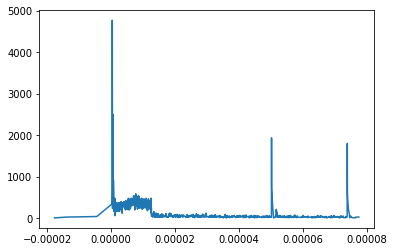

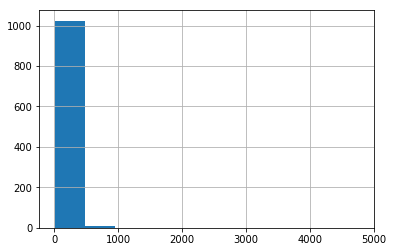

[    6.66666667   482.66666667   958.66666667  1434.66666667  1910.66666667
  2386.66666667  2862.66666667  3338.66666667  3814.66666667  4290.66666667
  4766.66666667]
[1024    9    1    1    1    1    0    0    0    1]


In [36]:
fltd = dfdict['Test2.1'][
    
    (dfdict['Test2.1']['CH1(V)']  > 0) & (dfdict['Test2.1']['CH1(V)'] < 10) &
    (dfdict['Test2.1']['Power(W)']  > 0) 

    
][['Time(s)','Power(W)']]

plt.plot(fltd['Time(s)'],fltd['Power(W)'])

dfhist = dfdict['Test2.1'][
    
    (dfdict['Test2.1']['CH1(V)']  > 0) & (dfdict['Test2.1']['CH1(V)'] < 10) &
    (dfdict['Test2.1']['Power(W)']  > 0) 

]['Power(W)']
plt.figure()
dfhist.hist()
plt.show()

counts, bins = np.histogram(dfhist.values)
print(bins)
print(counts)

# Data Filtering Attempts

In [ ]:
dfdict['Test2.1']['CH1(V)'].loc[ dfdict['Test2.1']['CH1(V)'] > 10 ].plot()
plt.show()

In [5]:
#filtering data for outliers with standard deviations...hard to choose the right coefficients 

dfdict['Test2.1'][
    
    (dfdict['Test2.1']['CH1(V)']  > 0) & (dfdict['Test2.1']['CH1(V)'] < 10) &
    (dfdict['Test2.1']['Power(W)']  > 0) & 
    (dfdict['Test2.1']['Power(W)'][np.abs(dfdict['Test2.1']['Power(W)'] - dfdict['Test2.1']['Power(W)'].mean()) < (0.9*dfdict['Test2.1']['Power(W)'].std())])
    
]['Power(W)'].plot()
plt.show()

KeyError: 'Power(W)'

In [ ]:
#filtering data for outliers with standard deviations...hard to choose the right coefficients 

mval = dfdict['Test2.1']['Power(W)'][np.abs(dfdict['Test2.1']['Power(W)'] - dfdict['Test2.1']['Power(W)'].mean()) 
                                    < (2*dfdict['Test2.1']['Power(W)'].std())].max()
print(mval)
#Still showing those spikes....
print(dfdict['Test2.1']['Power(W)'].std())

In [44]:
#Soham's idea: if frequency of spikes not too high, then just go ahead with straight integration

dfdict['Test2.1'][
    
    (dfdict['Test2.1']['CH1(V)']  > 0) & (dfdict['Test2.1']['CH1(V)'] < 10) &
    (dfdict['Test2.1']['Power(W)']  > 0) 

]['Power(W)'].describe()

count    1038.000000
mean      138.985228
std       230.618820
min         6.666667
25%        33.333333
50%        53.333333
75%       240.000000
max      4766.666667
Name: Power(W), dtype: float64

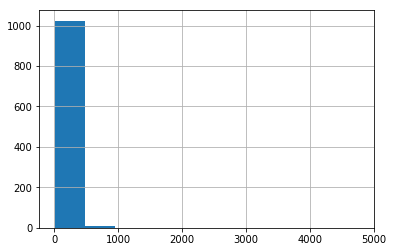

In [180]:
dfhist = dfdict['Test2.1'][
    
    (dfdict['Test2.1']['CH1(V)']  > 0) & (dfdict['Test2.1']['CH1(V)'] < 10) &
    (dfdict['Test2.1']['Power(W)']  > 0) 

]['Power(W)']
dfhist.hist()
plt.show()

In [185]:
counts, bins = np.histogram(dfhist.values)
print(bins)
print(counts)

[    6.66666667   482.66666667   958.66666667  1434.66666667  1910.66666667
  2386.66666667  2862.66666667  3338.66666667  3814.66666667  4290.66666667
  4766.66666667]
[1024    9    1    1    1    1    0    0    0    1]


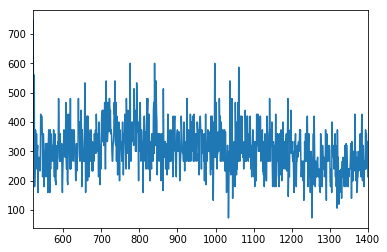

In [74]:
#Try to slice data, but you don't know which index to slice for each trial/test

newdf = dfdict['Test2.2']['Power(W)'].loc[0 < dfdict['Test2.2']['Power(W)']]
newdf.loc[520:1400].plot()
plt.show()

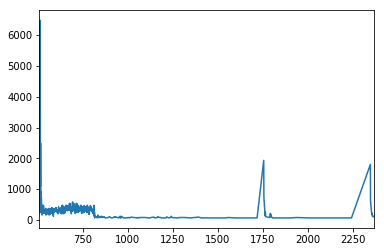

In [13]:
dfdict['Test2.1']['Power(W)'].ix[dfdict['Test2.1']['Power(W)'] > 60].plot()
plt.show()

In [186]:
#Adding necessary columns

dfdict['Test2']['Voltage(V)'] = dfdict['Test2']['CH3(V)'] - dfdict['Test2']['CH4(V)']

dfdict['Test2']['Current(A)'] = (dfdict['Test2']['CH2(V)'] - dfdict['Test2']['CH3(V)'])/0.6

dfdict['Test2']['Power(W)'] = dfdict['Test2']['Voltage(V)'] * dfdict['Test2']['Current(A)']


dfdict['Test2']['Power(W)'].plot()
plt.show()

KeyError: 'Test2'

In [84]:
#importing all files in to a LIST

path = r'C:\Users\jbpat\Documents\ME451Research\Tests'
allFiles = glob.glob(os.path.join(path,"*.csv"))

dflist=[]

for file_ in allFiles:
    dflist.append(pd.read_csv(file_, sep=',', header=None, usecols=[3,4,10,16,22], \
                    names=['Time(s)', 'CH1(V)', 'CH2(V)', 'CH3(V)','CH4(V)']))

len(dflist)

15

In [ ]:
#Only want to use particular columns

test2 = pd.read_csv('Test2.csv', sep=',', header=None, usecols=[3,4,10,16,22], \
                    names=['Time(s)', 'CH1(V)', 'CH2(V)', 'CH3(V)','CH4(V)'])

In [ ]:
#Iterates through all excel files (test1, test2, ...) and makes graphs
#Replaced by new method for trials and tests...
for key, value in dfdict.items():
    dfdict[key]['Voltage(V)'] = dfdict[key]['CH3(V)'] - dfdict[key]['CH4(V)']
    dfdict[key]['Current(A)'] = (dfdict[key]['CH2(V)'] - dfdict[key]['CH3(V)'])/0.6
    dfdict[key]['Power(W)'] = dfdict[key]['Voltage(V)'] * dfdict[key]['Current(A)']
    plt.plot(dfdict[key]['Time(s)'],dfdict[key]['Power(W)'])
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%2.1e'))
    plt.xlabel('Time(s)')
    plt.ylabel('Discharge Energy(J)')
    #axes = plt.gca()
    #axes.set_xlim(left=0)
    #axes.set_ylim([ymin,ymax])
    #dfdict[key]['Power(W)'].ix[dfdict[key]['Power(W)'] > dfdict[key]['Power(W)'].mean()].plot()
    plt.title(key)
    plt.show()

In [ ]:
#New Plotting loop for tests in each trial

for test in np.arange(1,4):
   
    plt.figure(figsize=(20,10))
    leglbl = []
    
    for trial in np.arange(1,6):
        key = "Test"+str(test)+"."+str(trial)
        
        dfdict[key]['Voltage(V)'] = dfdict[key]['CH3(V)'] - dfdict[key]['CH4(V)']
        dfdict[key]['Current(A)'] = (dfdict[key]['CH2(V)'] - dfdict[key]['CH3(V)'])/0.6
        dfdict[key]['Power(W)'] = dfdict[key]['Voltage(V)'] * dfdict[key]['Current(A)']
        #(dfdict[key]['CH2(V)']-dfdict[key]['CH3(V)']).plot()
        #dfdict[key]['Voltage(V)'].plot()
        #dfdict[key]['Current(A)'].plot()
        plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%2.1e'))
        plt.xlabel('Time(s)',fontsize=20)
        #plt.ylabel('Discharge Energy(J)',fontsize=20)
        leglbl.append("Trial:"+str(trial))
        plt.legend(leglbl)
        #plt.plot(dfdict[key]['Time(s)'], dfdict[key]['Voltage(V)'], dfdict[key]['Time(s)'], dfdict[key]['Current(A)'])
        plt.plot(dfdict[key]['Time(s)'].loc[ dfdict[key]['CH1(V)'] < 10 ],dfdict[key]['Power(W)'].loc[ dfdict[key]['CH1(V)'] < 10 ])
        #dfdict[key]['Power(W)'][0.00005:2000].plot()
        
        
        
    
    plt.title("Test " +str(test),fontsize=20)
    plt.gcf().savefig('{}.png'.format("Test " +str(test)))
    plt.show()

In [73]:
#playing around with dictionaries
myd = {}
for i in range(0,3):
    myd[i] = {}
    for j in range(0,6):
        myd[i][j] = str(j+i)

for key,value in myd.items():
    print (key,value)

0 {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5'}
1 {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6'}
2 {0: '2', 1: '3', 2: '4', 3: '5', 4: '6', 5: '7'}


In [ ]:
my_list = []
my_array = np.
for i in range(0,5):
    for j in range(0,6):
        ary = np.arange(i+j)
        my_list.append(ary)

print(my_list[2])

In [ ]:
stat_dict = {}
stat_dflist = [[],[],[],[],[]]

for test in np.arange(1,4):
   
    plt.figure(figsize=(20,10))
    leglbl = []
    
    for trial in np.arange(1,6):
        key = "Test"+str(test)+"."+str(trial)
        
        #Calculate V, I, P
        dfdict[key]['Voltage(V)'] = dfdict[key]['CH3(V)'] - dfdict[key]['CH4(V)']
        dfdict[key]['Current(A)'] = (dfdict[key]['CH2(V)'] - dfdict[key]['CH3(V)'])/0.6
        dfdict[key]['Power(W)'] = dfdict[key]['Voltage(V)'] * dfdict[key]['Current(A)']
        
        #Filter data
        fltd = dfdict[key][
    
                (dfdict[key]['CH1(V)']  > 0) & (dfdict[key]['CH1(V)'] < 10) &
                (dfdict[key]['Power(W)']  > 0) 

               ][['Time(s)','Power(W)']]
        
        stat_dflist[test].append(fltd['Power(W)'].describe())
        
        plt.plot(fltd['Time(s)'],fltd['Power(W)'])
        plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%2.1e'))
        plt.xlabel('Time(s)',fontsize=20)
        plt.ylabel('Power(W)',fontsize=20)
        leglbl.append("Trial:"+str(trial))
        plt.legend(leglbl)
        
                        
    plt.title("Test " +str(test),fontsize=20)
    plt.gcf().savefig('{}.png'.format("Test " +str(test)))
    #plt.show()
    

print(stat_dflist[1][1].values.shape)



In [29]:
statary = np.empty((8,5))
statary = stat_dflist[1][1].values
print(statary)
stat_dflist[1][1]

[ 1038.           138.985228     230.61882008     6.66666667    33.33333333
    53.33333333   240.          4766.66666667]


count    1038.000000
mean      138.985228
std       230.618820
min         6.666667
25%        33.333333
50%        53.333333
75%       240.000000
max      4766.666667
Name: Power(W), dtype: float64

In [3]:
stat_dict = {} #dictionary of tests having dictionaries of trials of dataframes that hold stats about power
dfdict_stat = {}  #this will eventually be a dataframe

nrg_temp = np.zeros((4,6)) #array to store discharge energy for each test and trials
#df_nrg = {} #this will eventuall be a dataframe

for test in np.arange(1,4):
   
    plt.figure(figsize=(20,10))
    leglbl = []
    
    stat_dict[test] = {}
    #nrg[test] = {}
    
    for trial in np.arange(1,6):
        key = "Test"+str(test)+"."+str(trial)
        
        #Calculate V, I, P
        dfdict[key]['Voltage(V)'] = dfdict[key]['CH3(V)'] - dfdict[key]['CH4(V)']
        dfdict[key]['Current(A)'] = (dfdict[key]['CH2(V)'] - dfdict[key]['CH3(V)'])/0.6
        dfdict[key]['Power(W)'] = dfdict[key]['Voltage(V)'] * dfdict[key]['Current(A)']
        
        #Filter data
        fltd = dfdict[key][
    
                (dfdict[key]['CH1(V)']  > 0) & (dfdict[key]['CH1(V)'] < 10) &
                (dfdict[key]['Power(W)']  > 0) & (dfdict[key]['Time(s)']  > 0)

               ][['Time(s)','Power(W)']]
        
        #calculate energy
        nrg_temp[test,trial] = np.trapz(fltd['Power(W)'].values, fltd['Time(s)'].values)*1000 #energy in millliJoules
        
        #Generate summary (Power(W)) of trials, stored in dictionary 'stat_dict' within 'sub'-dictionary 'key'
        stat_dict[test][trial] = (fltd['Power(W)'].describe()).drop(['25%','50%','75%'])
        
        #Make plots
        plt.plot(fltd['Time(s)'],fltd['Power(W)'])
        plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%2.1e'))
        plt.xlabel('Time(s)',fontsize=20)
        plt.ylabel('Power(W)',fontsize=20)
        leglbl.append("Trial:"+str(trial))
        plt.legend(leglbl)
    
    #Make dataframe of stats summary 
    dfdict_stat[test] = pd.DataFrame(stat_dict[test])                    
    dfdict_stat[test]['Trials Average'] = dfdict_stat[test].mean(axis=1) 
    
    
    plt.title("Test " +str(test),fontsize=20)
    plt.gcf().savefig('{}.png'.format("Test " +str(test)))
    #plt.show()

nrg = nrg_temp[1:4,1:6]
nrg_df = pd.DataFrame(nrg, index= ['Test '+str(i) for i in range(1,4)], 
                      columns = ['Trial ' + str(j) for j in range(1,6)] )


NameError: name 'dfdict' is not defined

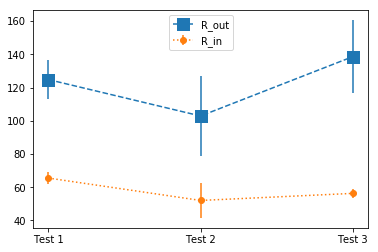

In [178]:

label = or_df.index
lgd = ['R_outer', 'R_inner']
plt.errorbar([1,2,3], or_df['Avg Rout(micron)'], or_df['Std Rout(micron)'],
            marker='s', mew=7, ls='dashed', barsabove=True, label ='R_out')
plt.errorbar([1,2,3], ir_df['Avg Rin(micron)'], ir_df['Std Rin(micron)'],
            marker='o', ls='dotted', barsabove=True, label = 'R_in')
plt.xticks([1,2,3], label)
plt.legend(loc='upper center')
plt.show()
